In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score as adj

df = pd.read_csv('wine.data.csv')
label = pd.Series(df['Label'])
df.drop('Label',1,inplace=True)
df.head(15)

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0     14.23        1.71  2.43               15.6        127           2.80   
1     13.20        1.78  2.14               11.2        100           2.65   
2     13.16        2.36  2.67               18.6        101           2.80   
3     14.37        1.95  2.50               16.8        113           3.85   
4     13.24        2.59  2.87               21.0        118           2.80   
5     14.20        1.76  2.45               15.2        112           3.27   
6     14.39        1.87  2.45               14.6         96           2.50   
7     14.06        2.15  2.61               17.6        121           2.60   
8     14.83        1.64  2.17               14.0         97           2.80   
9     13.86        1.35  2.27               16.0         98           2.98   
10    14.10        2.16  2.30               18.0        105           2.95   
11    14.12        1.48  2.32               16.8         95           2.20   
12    13.75        1.73  2.41               16.0         89           2.60   
13    14.75        1.73  2.39               11.4         91           3.10   
14    14.38        1.87  2.38               12.0        102           3.30   

    Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0         3.06                  0.28             2.29             5.64  1.04   
1         2.76                  0.26             1.28             4.38  1.05   
2         3.24                  0.30             2.81             5.68  1.03   
3         3.49                  0.24             2.18             7.80  0.86   
4         2.69                  0.39             1.82             4.32  1.04   
5         3.39                  0.34             1.97             6.75  1.05   
6         2.52                  0.30             1.98             5.25  1.02   
7         2.51                  0.31             1.25             5.05  1.06   
8         2.98                  0.29             1.98             5.20  1.08   
9         3.15                  0.22             1.85             7.22  1.01   
10        3.32                  0.22             2.38             5.75  1.25   
11        2.43                  0.26             1.57             5.00  1.17   
12        2.76                  0.29             1.81             5.60  1.15   
13        3.69                  0.43             2.81             5.40  1.25   
14        3.64                  0.29             2.96             7.50  1.20   

    OD280  Proline  
0    3.92     1065  
1    3.40     1050  
2    3.17     1185  
3    3.45     1480  
4    2.93      735  
5    2.85     1450  
6    3.58     1290  
7    3.58     1295  
8    2.85     1045  
9    3.55     1045  
10   3.17     1510  
11   2.82     1280  
12   2.90     1320  
13   2.73     1150  
14   3.00     1547

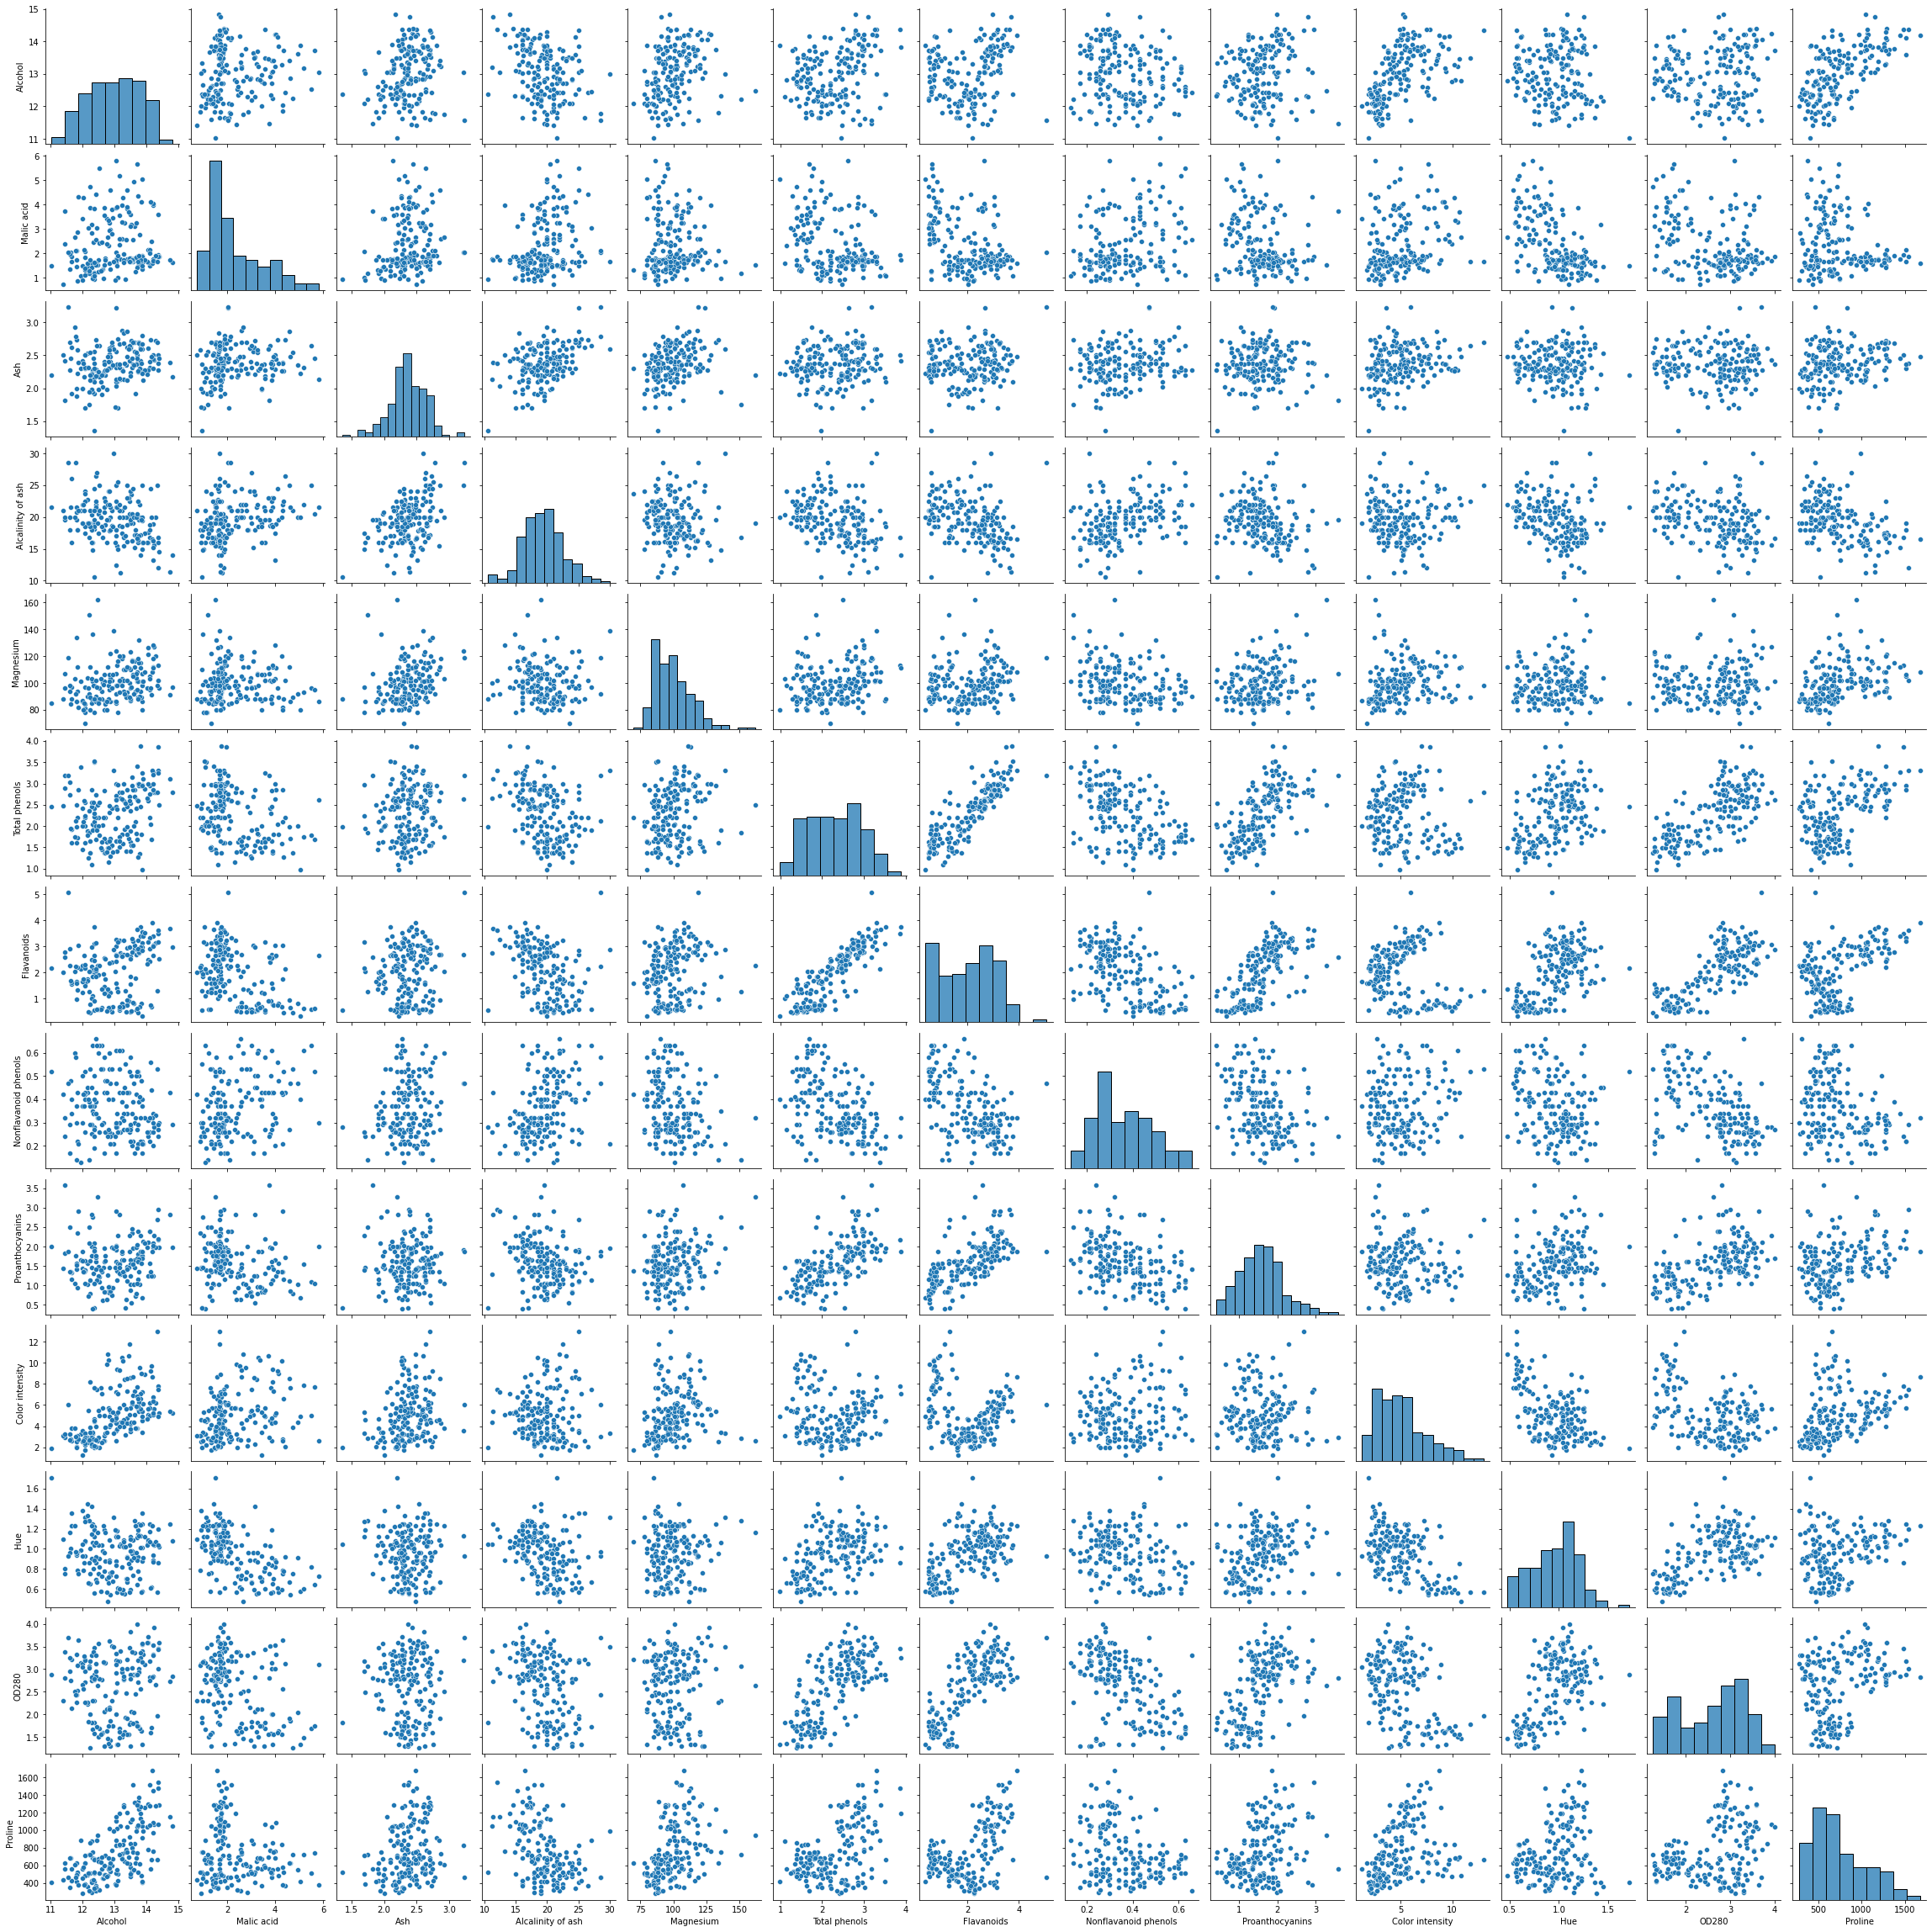

In [2]:
sns.pairplot(df)
# whilst some variables have little correlation many do seem to have one or two long groups at different angles

[('Total phenols', 'Flavanoids', 0.8645635000951156),
 ('Flavanoids', 'OD280', 0.7871939018669513),
 ('Total phenols', 'OD280', 0.6999493647911864)]

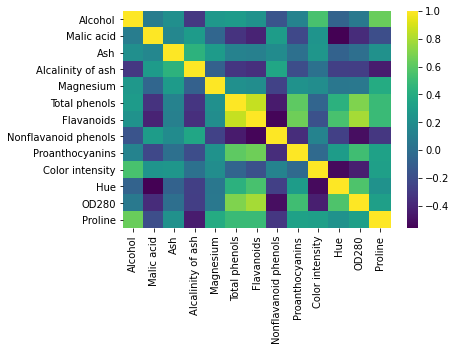

In [3]:
sns.heatmap(df.corr(),cmap="viridis")
corr = df.corr()
corrlist = []
def corrsort (element):
    return element[2]
for e,x in enumerate(corr.columns):
    for y in corr.columns[e+1:]:
        corrlist.append((x,y,corr[x][y]))
corrlist.sort(reverse=True,key=corrsort)
corrlist[:3]

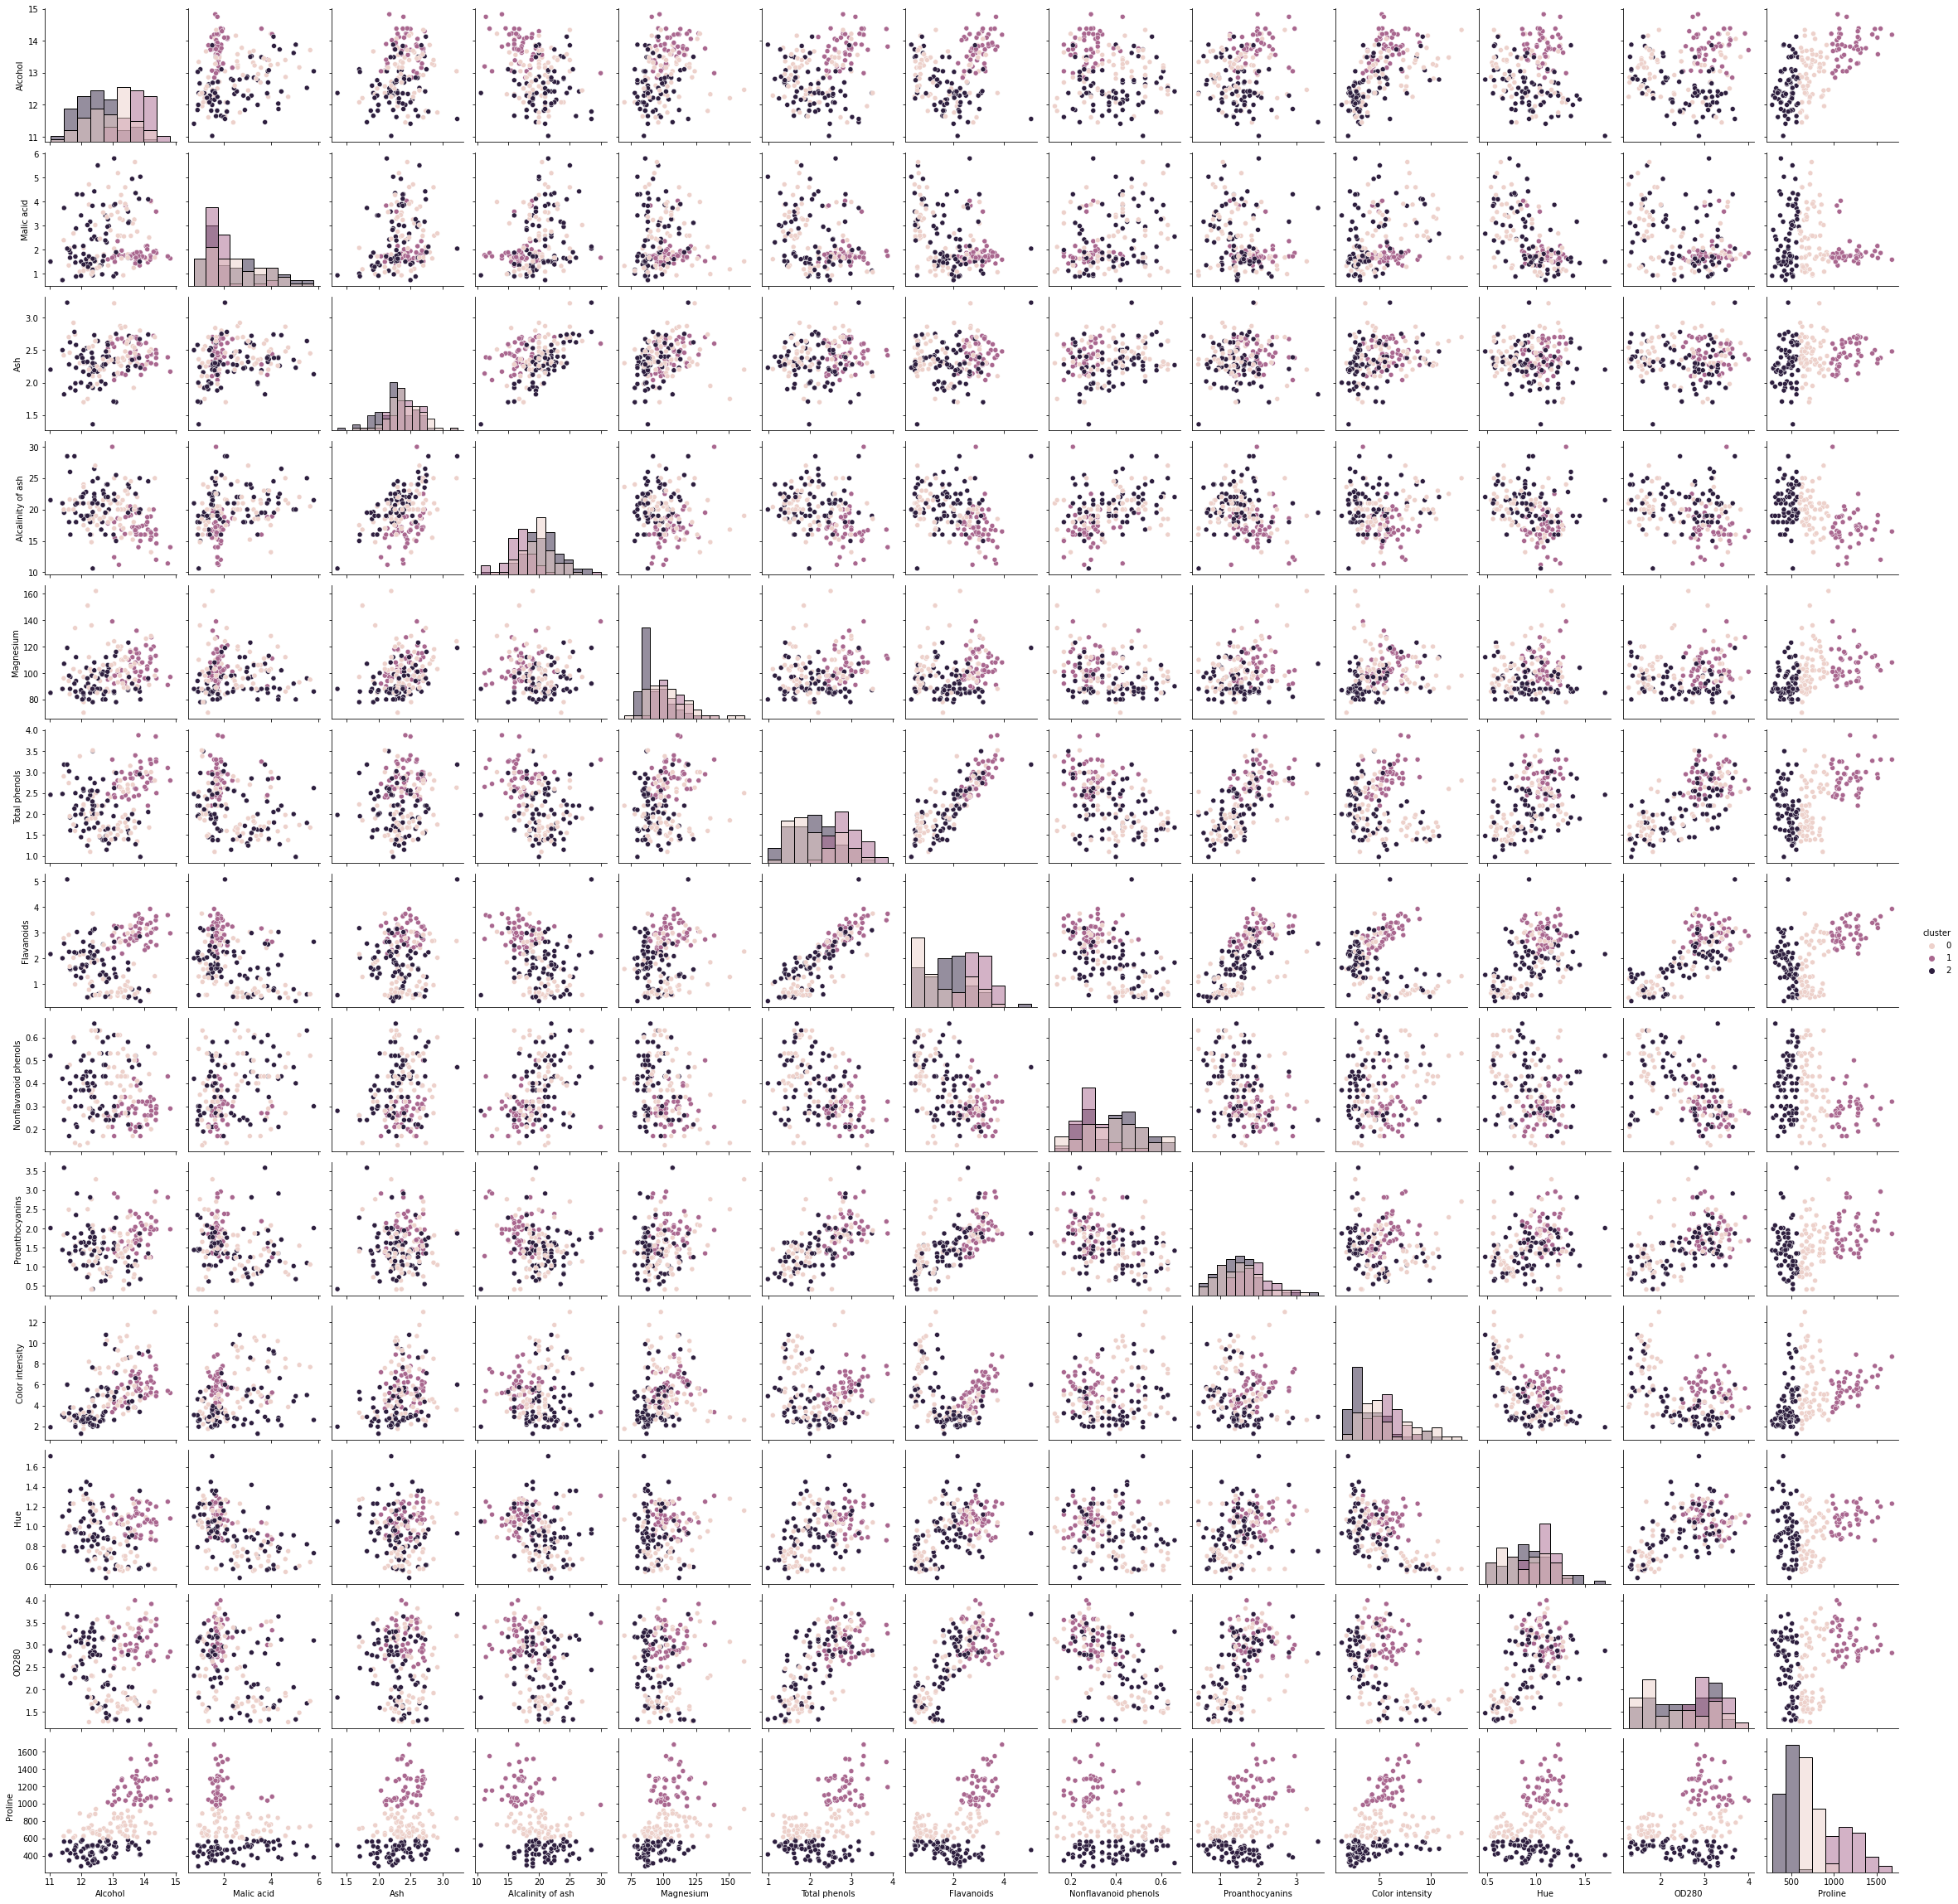

In [4]:
km = KMeans(n_clusters = 3, random_state=0).fit_predict(df)
df["cluster"] = km
sns_plot = sns.pairplot(df, hue = "cluster",diag_kind="hist")

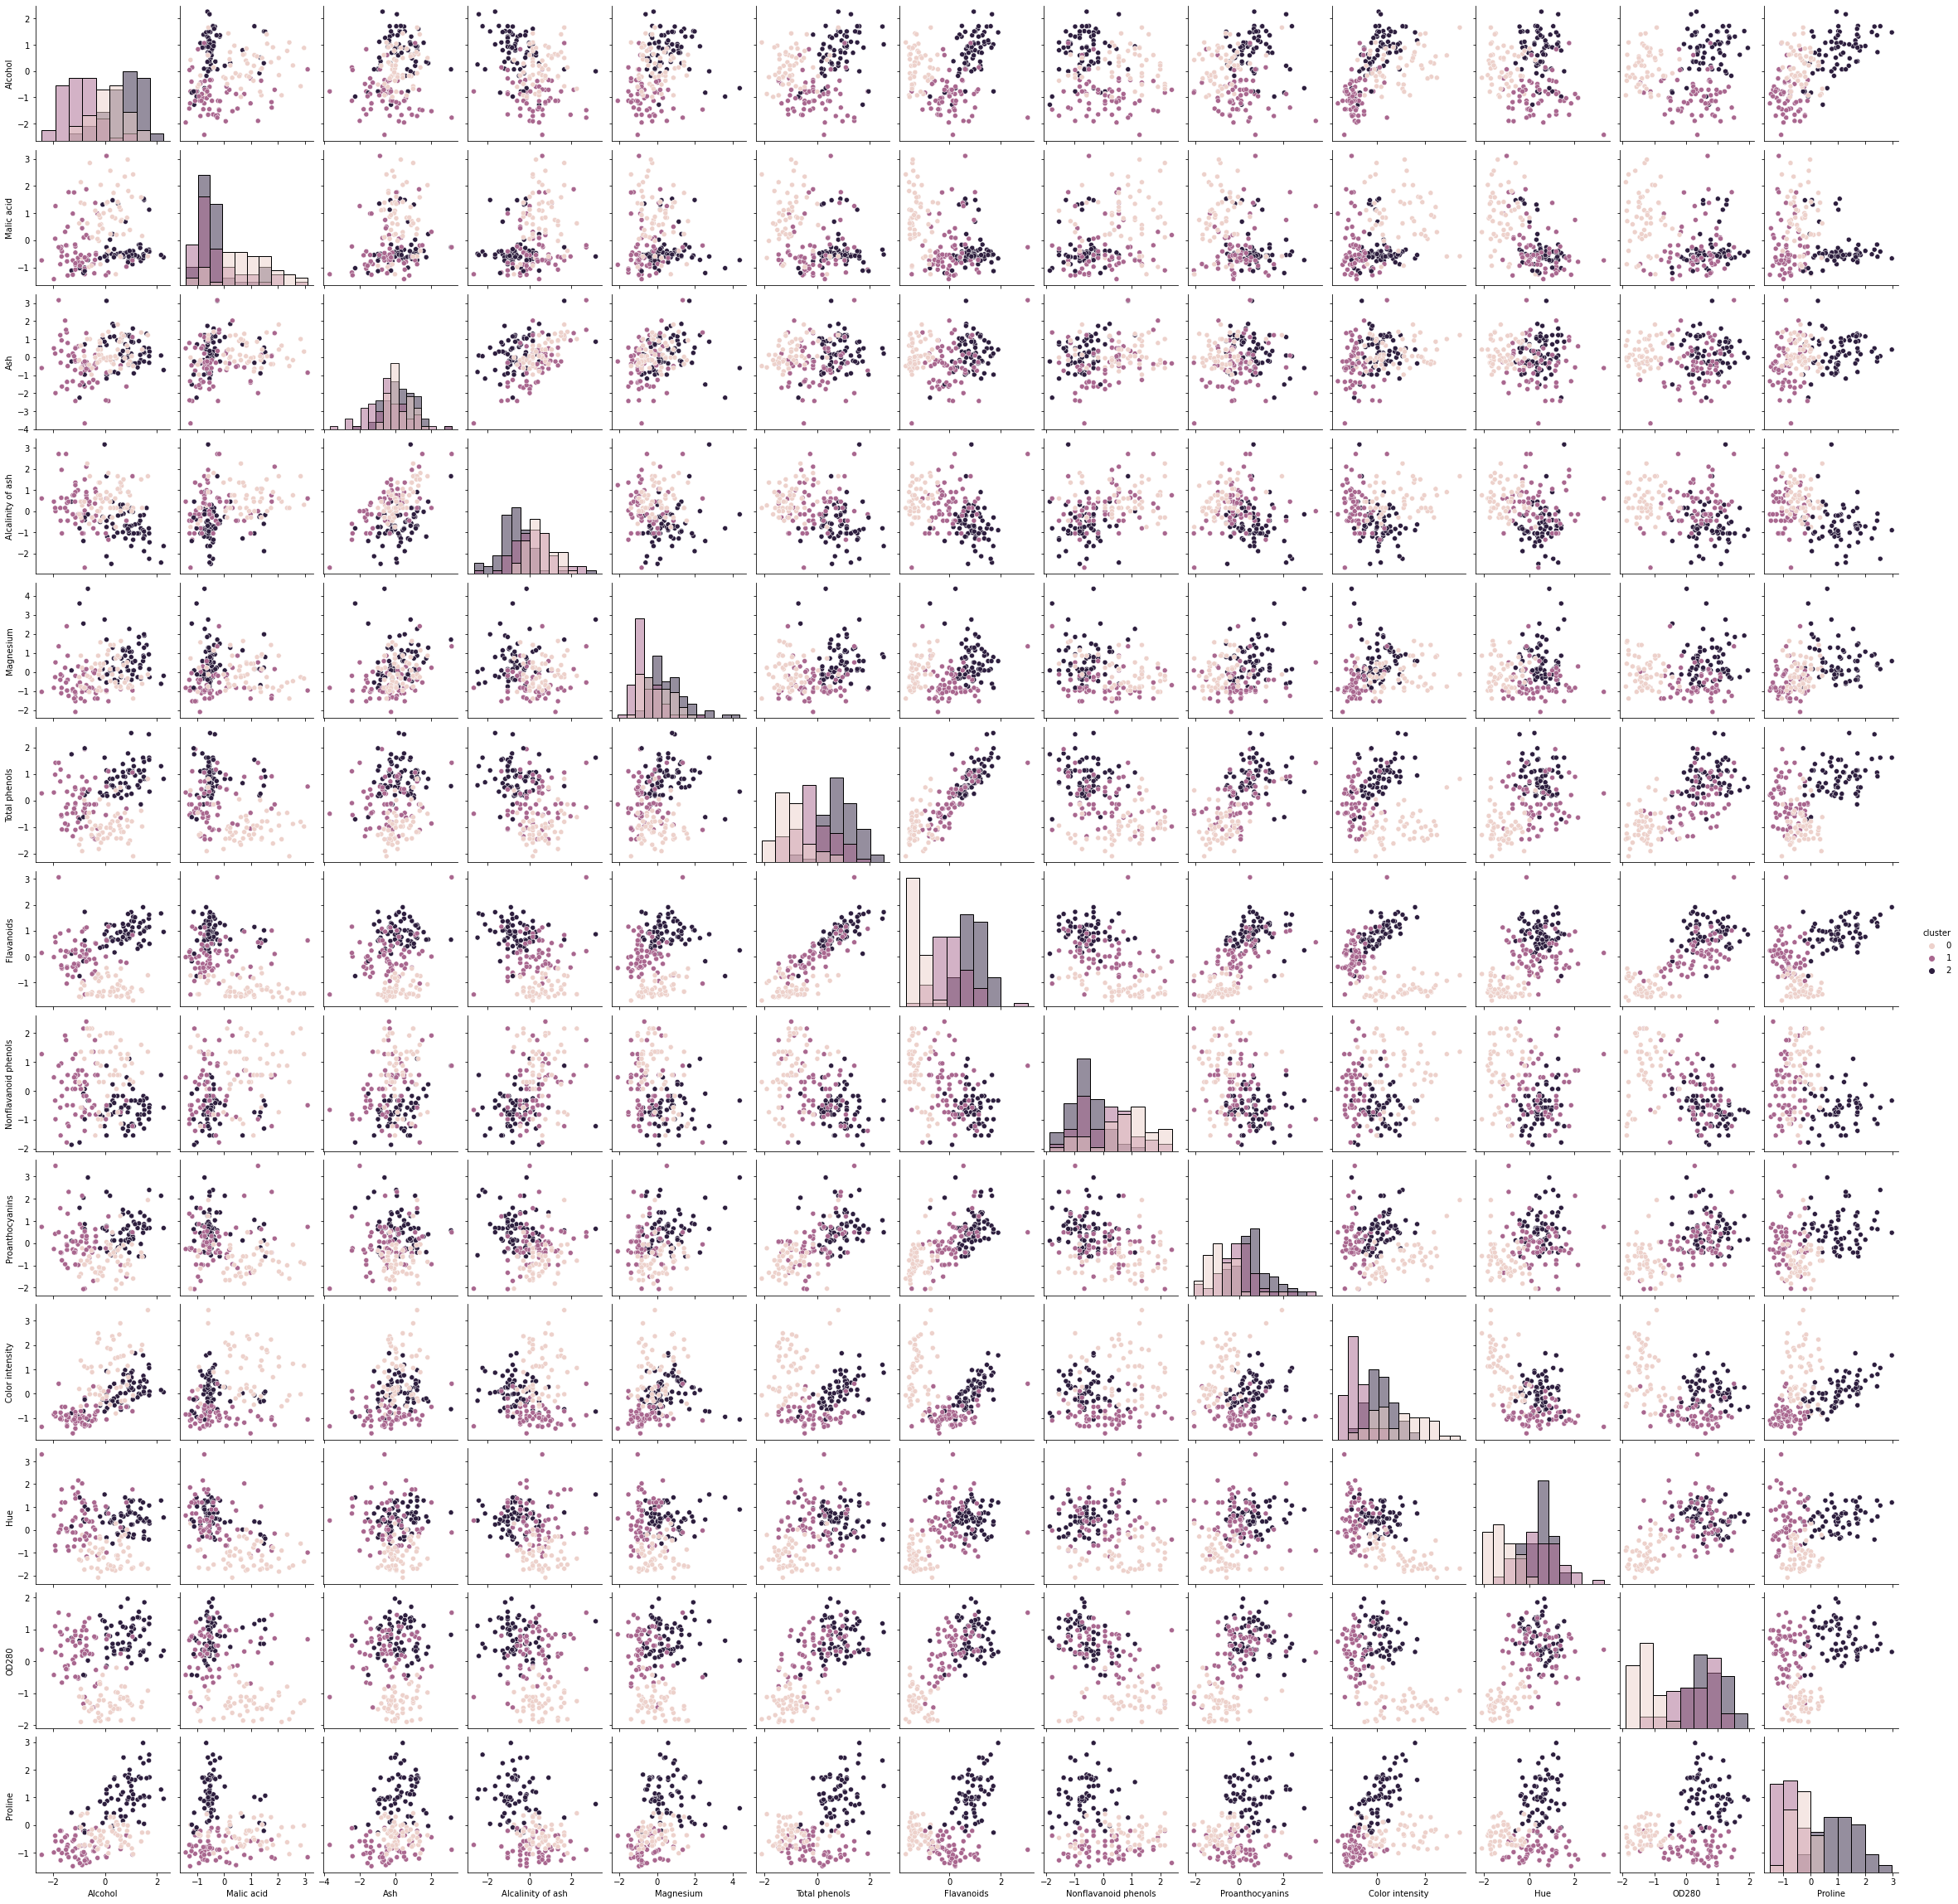

In [5]:
standardScaler = StandardScaler()
standardScaler.fit(df)
X_scaled_array = standardScaler.transform(df)
ndf = pd.DataFrame(X_scaled_array, columns = df.columns)
km = KMeans(n_clusters = 3, random_state=0).fit_predict(ndf)
ndf["cluster"] = km
sns_plot = sns.pairplot(ndf, hue = "cluster",diag_kind="hist")

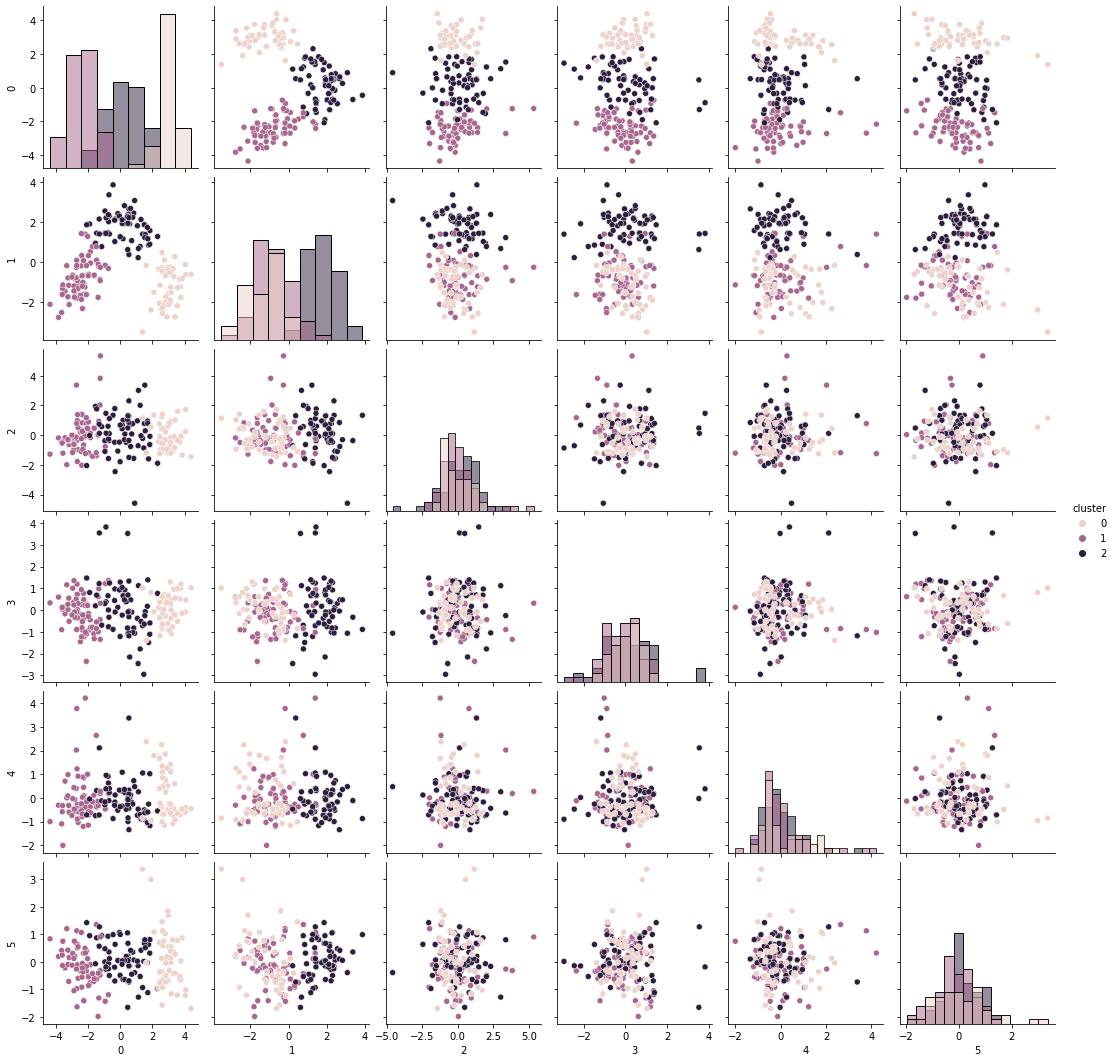

In [6]:
tdf = pd.DataFrame(PCA(n_components = 6).fit_transform(ndf))
km = KMeans(n_clusters = 3, random_state=0).fit_predict(tdf)
tdf["cluster"] = km
sns_plot = sns.pairplot(tdf, hue = "cluster",diag_kind="hist")

In [7]:
adj(label,km)
# it seems that after normalising, and reducing the data the k-means results are quite accurate even if not perfect

0.8617967592137037